In [1]:
## Import libraries
import os
import numpy as np
import pandas as pd
import tensorflow as tf 
import xgboost as xgb 
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

2023-08-06 19:28:29.298325: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-06 19:28:30.425780: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-08-06 19:28:30.446217: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-08-06 19:28:34.403606: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


#### Importing Data

In [2]:
biomass = pd.read_csv("dataset/Biomass_History.csv")
distance = pd.read_csv("dataset/Distance_Matrix.csv")


# 1.- Data Exploration

## 1.1 Biomass

In [8]:
biomass.rename(columns={'Index': 'i'}, inplace=True)

In [9]:
biomass.head()

,i,Latitude,Longitude,2010,2011,2012,2013,2014,2015,2016,2017
0,0,24.66818,71.33144,8.475744,8.868568,9.202181,6.023070,10.788374,6.647325,7.387925,5.180296
1,1,24.66818,71.41106,24.029778,28.551348,25.866415,21.634459,34.419411,27.361908,40.431847,42.126945
2,2,24.66818,71.49069,44.831635,66.111168,56.982258,53.003735,70.917908,42.517117,59.181629,73.203232
3,3,24.66818,71.57031,59.974419,80.821304,78.956543,63.160561,93.513924,70.203171,74.536720,101.067352
4,4,24.66818,71.64994,14.653370,19.327524,21.928144,17.899586,19.534035,19.165791,16.531315,26.086885


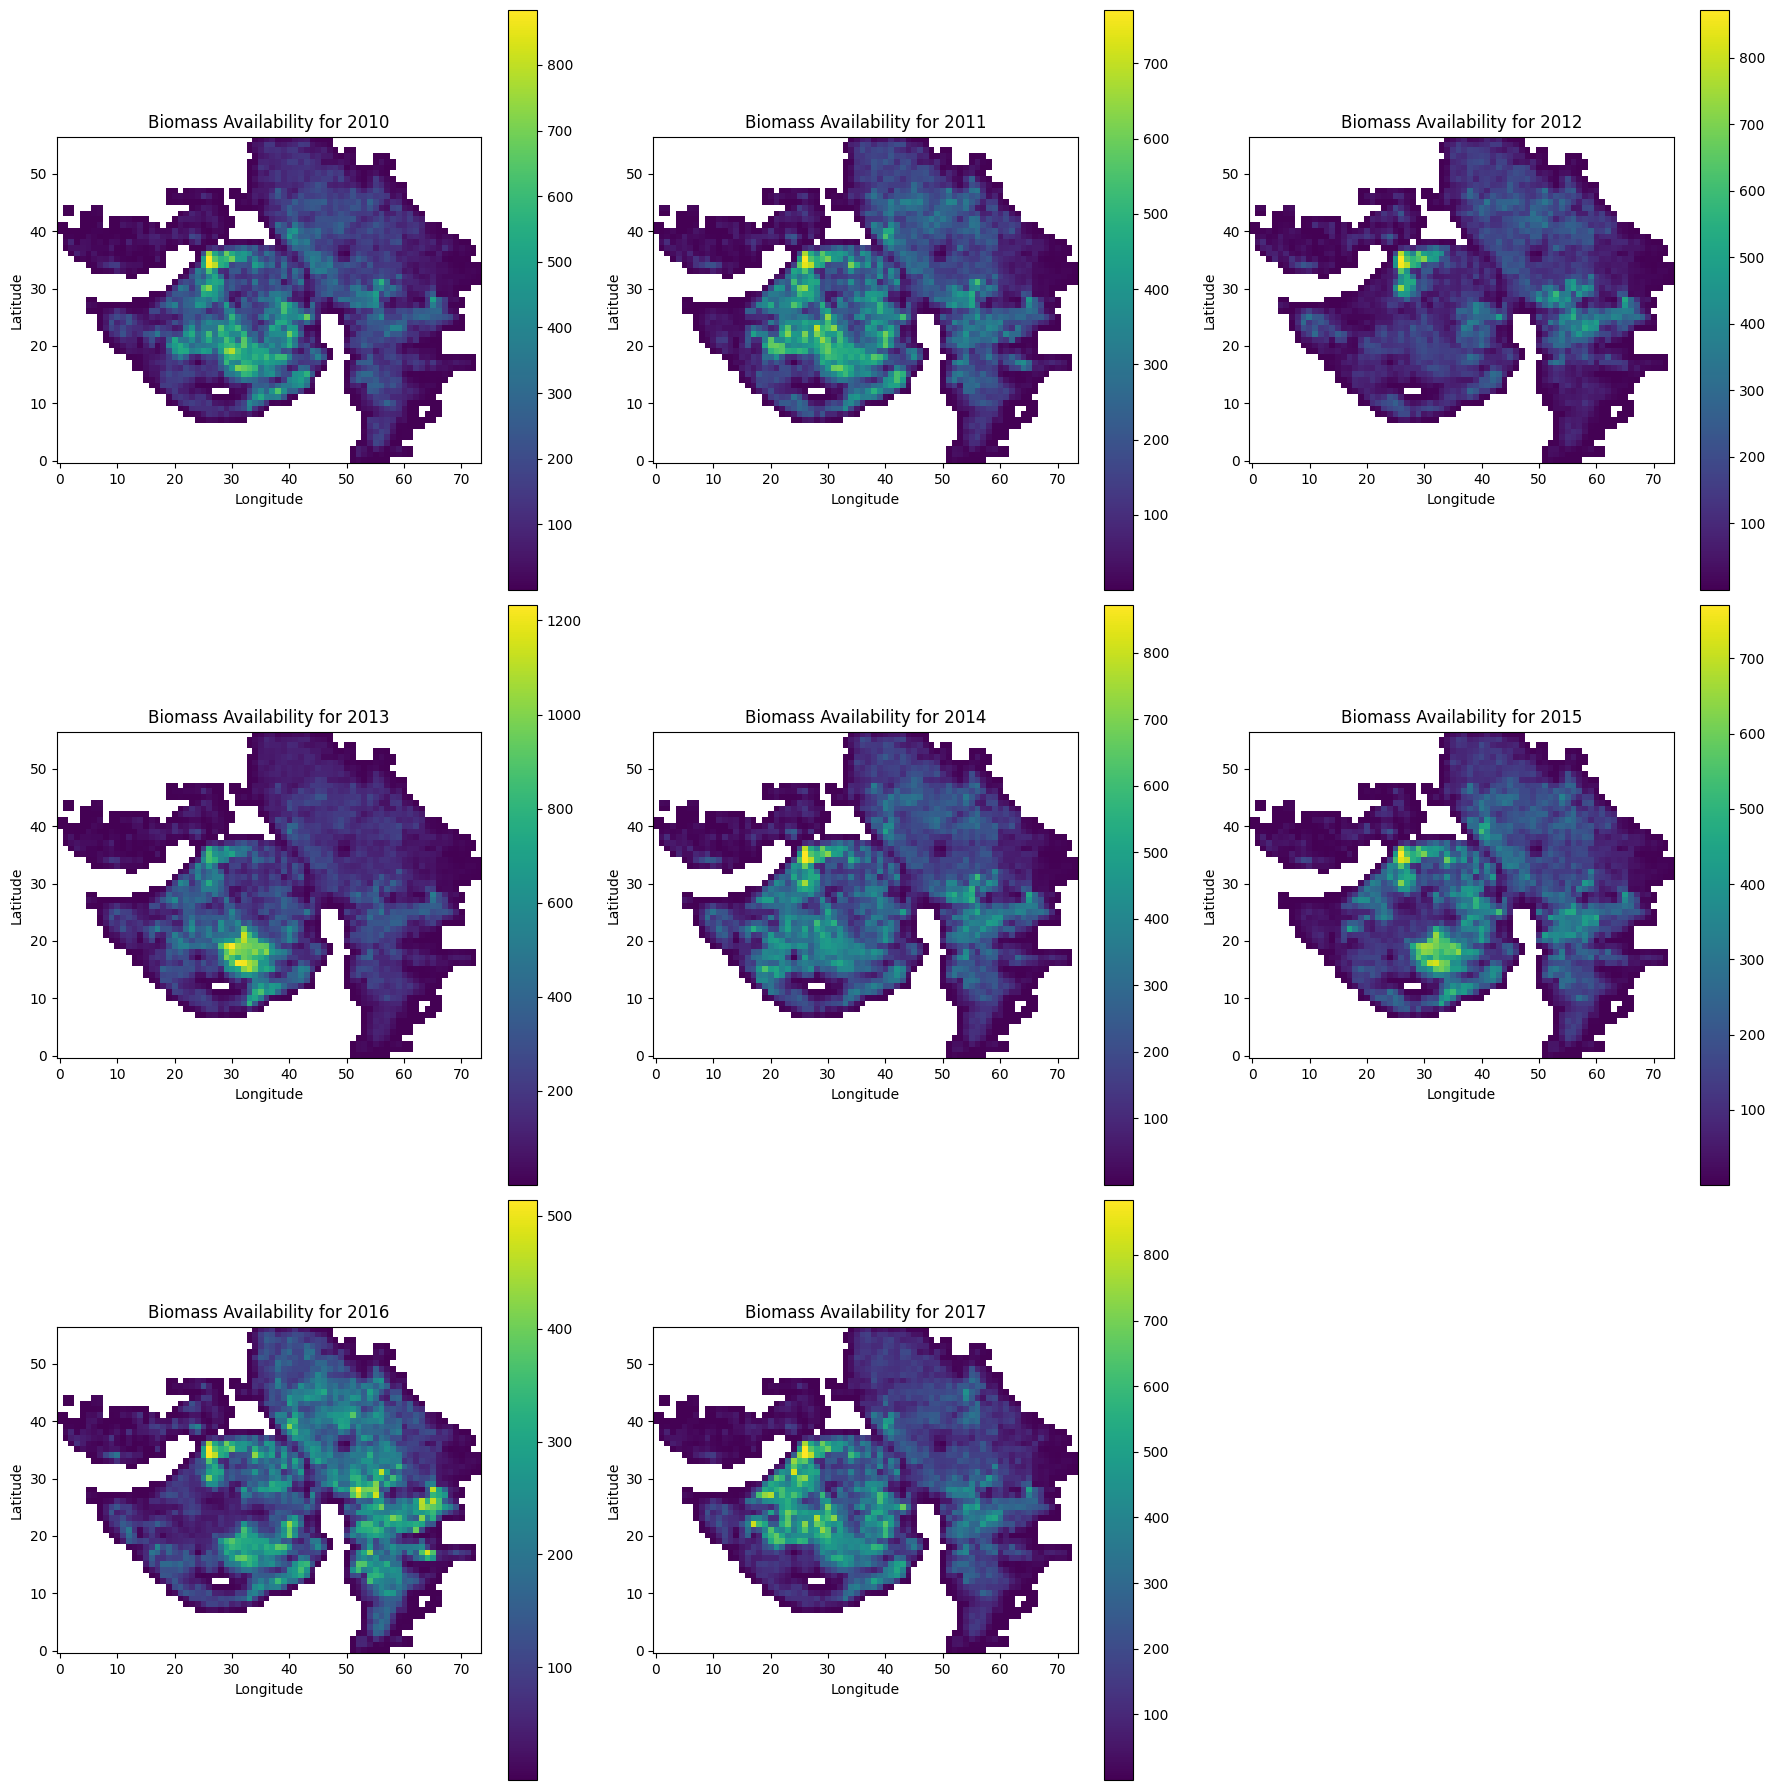

In [7]:
# Define colors for each year
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'pink', 'gray']

# Create a 3x3 grid of subplots
fig, axs = plt.subplots(3, 3, figsize=(18, 18))

# Flatten the axs array to iterate over it easily
axs = axs.flatten()


# Plot each year's data in a separate subplot
years = biomass.columns[3:]
for i, year in enumerate(years):
    heatmap_data = biomass.pivot_table(values=year, index='Latitude', columns='Longitude')
    im = axs[i].imshow(heatmap_data, cmap='viridis', interpolation='nearest', origin='lower')
    axs[i].set_xlabel('Longitude')
    axs[i].set_ylabel('Latitude')
    axs[i].set_title("Biomass Availability for "+ year)
    axs[i].grid(False)
    fig.colorbar(im, ax=axs[i])

# Hide any remaining empty subplots (if the number of years is less than 9)
for i in range(len(years), len(axs)):
    axs[i].axis('off')

plt.tight_layout()
plt.show()

### 1.2 Distance Matrix 

In [10]:
distance

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,2408,2409,2410,2411,2412,2413,2414,2415,2416,2417
0,0,0.0000,11.3769,20.4557,38.1227,45.3810,54.9915,78.6108,118.6750,102.6639,...,683.8771,687.6310,697.3246,669.3962,667.6788,665.5775,662.0291,665.9655,673.2073,681.4235
1,1,11.3769,0.0000,9.0788,28.9141,36.1724,45.7829,69.4022,78.2329,93.4553,...,681.6295,685.3833,695.0769,667.1485,665.4311,663.3298,659.7815,663.7178,670.9596,679.1758
2,2,20.4557,9.0788,0.0000,22.3791,29.6374,39.2478,62.8671,71.6979,86.9203,...,682.2323,685.9861,695.6796,667.7513,666.0339,663.9326,660.3843,664.3206,671.5623,679.7786
3,3,38.1227,28.9141,22.3791,0.0000,11.8343,23.5413,41.8396,50.6703,65.8927,...,681.4226,685.1765,694.8701,666.9417,665.2243,663.1230,659.5746,663.5110,670.7528,678.9690
4,4,45.3810,36.1724,29.6374,11.8343,0.0000,11.7070,24.3986,33.2293,53.9901,...,663.9816,667.7355,677.4291,649.5007,647.7833,645.6820,642.1336,646.0700,653.3118,661.5280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2413,2413,671.2005,668.9528,669.5556,669.9084,652.1102,640.4032,627.7116,622.9663,638.9532,...,109.0007,112.7545,122.4481,12.3091,9.1558,0.0000,14.5629,22.3860,36.6284,44.8446
2414,2414,663.4455,661.1978,661.8006,662.1534,644.3551,632.6481,619.9566,615.2112,631.1981,...,101.2456,104.9995,114.6931,26.4955,23.3422,14.1864,0.0000,14.5984,28.8407,37.0570
2415,2415,663.7748,661.5271,662.1298,662.4826,644.6844,632.9774,620.2859,615.5405,631.5274,...,84.1469,87.9008,97.5943,34.3098,31.1565,22.0007,12.8105,0.0000,14.2423,22.4586
2416,2416,671.0165,668.7688,669.3715,669.7244,651.9261,640.2191,627.5276,622.7822,638.7691,...,91.3886,95.1425,104.8361,48.5521,45.3988,36.2430,27.0528,14.2423,0.0000,12.4741


In [8]:
distance


,0,1,2,3,4,5,6,7,8,9,...,2408,2409,2410,2411,2412,2413,2414,2415,2416,2417
0,0.0000,11.3769,20.4557,38.1227,45.3810,54.9915,78.6108,118.6750,102.6639,113.4309,...,683.8771,687.6310,697.3246,669.3962,667.6788,665.5775,662.0291,665.9655,673.2073,681.4235
1,11.3769,0.0000,9.0788,28.9141,36.1724,45.7829,69.4022,78.2329,93.4553,111.1832,...,681.6295,685.3833,695.0769,667.1485,665.4311,663.3298,659.7815,663.7178,670.9596,679.1758
2,20.4557,9.0788,0.0000,22.3791,29.6374,39.2478,62.8671,71.6979,86.9203,111.7859,...,682.2323,685.9861,695.6796,667.7513,666.0339,663.9326,660.3843,664.3206,671.5623,679.7786
3,38.1227,28.9141,22.3791,0.0000,11.8343,23.5413,41.8396,50.6703,65.8927,82.5852,...,681.4226,685.1765,694.8701,666.9417,665.2243,663.1230,659.5746,663.5110,670.7528,678.9690
4,45.3810,36.1724,29.6374,11.8343,0.0000,11.7070,24.3986,33.2293,53.9901,65.1442,...,663.9816,667.7355,677.4291,649.5007,647.7833,645.6820,642.1336,646.0700,653.3118,661.5280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2413,671.2005,668.9528,669.5556,669.9084,652.1102,640.4032,627.7116,622.9663,638.9532,617.7221,...,109.0007,112.7545,122.4481,12.3091,9.1558,0.0000,14.5629,22.3860,36.6284,44.8446
2414,663.4455,661.1978,661.8006,662.1534,644.3551,632.6481,619.9566,615.2112,631.1981,609.9671,...,101.2456,104.9995,114.6931,26.4955,23.3422,14.1864,0.0000,14.5984,28.8407,37.0570
2415,663.7748,661.5271,662.1298,662.4826,644.6844,632.9774,620.2859,615.5405,631.5274,610.2964,...,84.1469,87.9008,97.5943,34.3098,31.1565,22.0007,12.8105,0.0000,14.2423,22.4586
2416,671.0165,668.7688,669.3715,669.7244,651.9261,640.2191,627.5276,622.7822,638.7691,617.5381,...,91.3886,95.1425,104.8361,48.5521,45.3988,36.2430,27.0528,14.2423,0.0000,12.4741


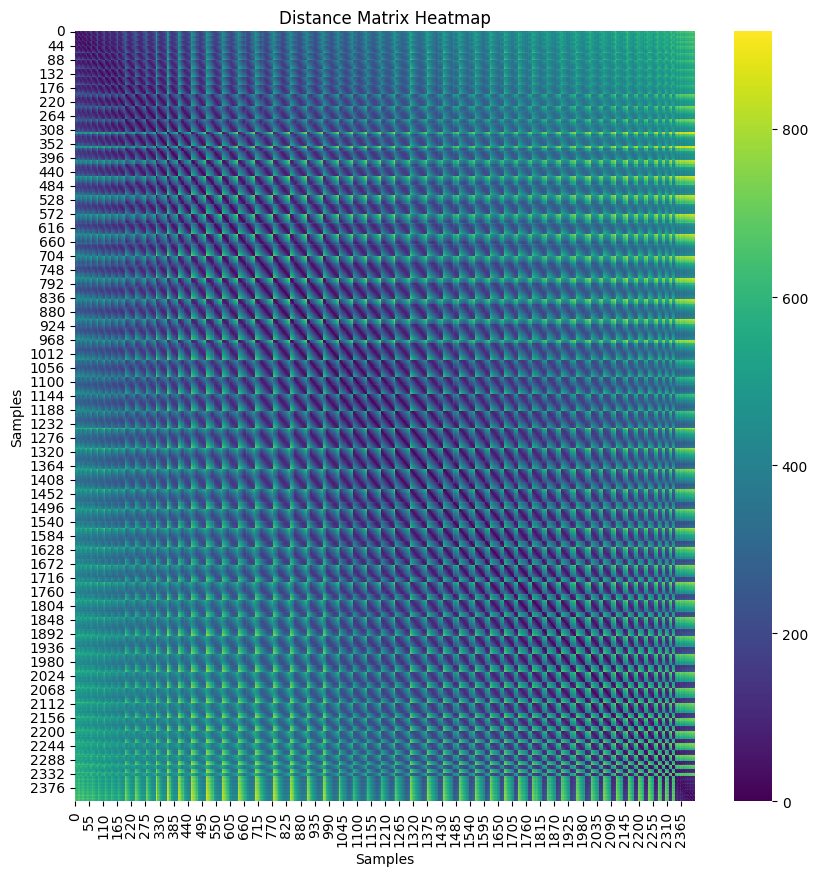

In [ ]:
# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 10))

# Create a heatmap using seaborn
sns.heatmap(distance, cmap='viridis', ax=ax)

# Set axis labels and title
ax.set_xlabel('Source')
ax.set_ylabel('Destination')
ax.set_title('Distance Matrix Heatmap')

# Show the plot
plt.show()